## DSCI 100 - Introduction to Data Science


### Lecture 9 - Introduction to linear regression

### First, Happy Halloween!

![](https://media.giphy.com/media/h2CfczI1ggcspHZ26z/giphy.gif)

## Upcoming in-class schedule:

- Tues, Nov 5: regular tutorial session (working on Jupyter notebook homework)
- Thurs, Nov 7: group project work session, attendance expected by all (not a normal lecture)
- Tues, Nov 12: Quiz 2 (followed by time to work on your group project afterwards)

## Upcoming due dates schedule:

- Sat, Nov 2: worksheet_09 due
- Wed, Nov 6: tutorial_09 due
- Sat, Nov 9: group project proposal due

Details described in Canvas

### Project clarification notes:

1. File format to be submitted should be .pdf or .html 


2. Your exploratory data analysis should only be done on your training data


3. Hence, for your proposal, you will have to split your data into a training and test data set

4. We have not learned more advanced methods for selecting predictors for a model (this is beyond the scope of this course). Thus for this project, use domain expertise and exploratory data analysis to choose reasonable predictors.

### Examples of classification questions:

- What political party will someone vote for in the next US election?

- Is a new patient diseased or healthy?

- Is a new email spam or not?

- Will a new, potential customer buy your product?

### Review: Regression prediction problem

What if we want to predict a quantitative value instead of a class label? 

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/07-edaRegr-1.png" width="500"/>

Today we will focus on another regression approach - linear regression.

For example, the price of a 2000 square foot home (from this reduced data set):

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/07-small-eda-regr-1.png" width="500"/>

### simple linear regression

First we find the line of "best-fit" through the data points:


<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-lin-reg1-1.png" width="500"/>

### simple linear regression

And then we "look up" the value we want to predict of off of the line. 


<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-lin-reg2-1.png" width="500"/>

### simple linear regression

How do we choose the line of "best fit"? We can draw many lines through the data:

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-several-lines-1.png" width="500"/>

### simple linear regression

We choose the line that minimzes the **average** vertical distance between itself and each of the observed data points

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-verticalDistToMin-1.png" width="500"/>

### Simple linear regression vs k-nn regression

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-compareRegression-1.png" width="1000"/>

### Why simple linear regression?

Advantages to restricting the model to straight line: interpretability!

Remembering that the equation for a straight line is: $Y = \beta_0 + \beta_1X$

Where:
- $\beta_0$ is the y-intercept of the line (the value where the line cuts the y-axis)
- $\beta_1$ is the slope of the line

<img align="left" src="img/straigh-line-equation.png" width="500"/>

We can then write: 

$house\: price = \beta_0 + \beta_1house\: size$

And finally, fill in the values for $\beta_0$ and $\beta_1$:

$house\: price = 13268.08 + 139*house\: size$

<img align="left" src="https://ubc-dsci.github.io/introduction-to-datascience/_main_files/figure-html/08-lm-predict-all-1.png" width="500"/>

*k-nn regression, as simple as it is to implement and understand, has no such interpretability from it's wiggly line.*

### Multivariate regression

Similar to classification, we can do prediction with regression with > 1 predictor. We can do this via k-nn or via linear regression. 



But wait? How do we fit a line with two predictors? 

We don't we fit a hyperplane!

### View examples from the textbook:

- [multivariate knn regression](https://ubc-dsci.github.io/introduction-to-datascience/regression1.html#multivariate-k-nn-regression) 

- [multivariate linear regression](https://ubc-dsci.github.io/introduction-to-datascience/regression2.html#multivariate-linear-regression) 

### Why not linear regression (sometimes?)

### Models are not like kitten hugs

<img align="left" src="https://pics.me.me/free-hugs-one-size-fits-all-purrs-included-28761428.png" width="250"/>

### They are more like suits: 

ONE SIZE DOES NOT FIT ALL!

<img align="left" src="http://www.chartingyourfinancialfuture.com/wp-content/uploads/2017/02/one-size-fits-all-funny-1024x423.png" width="800"/>



In [1]:
library(tidyverse)
library(repr)
theta <- seq(0,2*pi, length.out = 300)
circle <- tibble(X = sin(theta) + 0.75 * runif(300, min = 1, max = 2),
                 Y = cos(theta) + 0.75 * runif(300, min = 1, max = 2))
options(repr.plot.width = 4, repr.plot.height = 4)
circle_plot <- ggplot(circle, aes(x = X, y = Y)) +
    geom_point(alpha = 0.5) +
    geom_smooth(method = "lm", se = FALSE) +
    xlim(c(-0.5, 2.5)) +
    ylim(c(-0.5, 2.5))

zigzag <- tibble(X = seq(0,3*pi, length.out = 200),
                Y = cos(X) + runif(200, min = 1, max = 2))
zigzag_plot <- ggplot(zigzag, aes(x = X, y = Y)) +
    geom_point(alpha = 0.5) +
    geom_smooth(method = "lm", se = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


### Be cautious with linear regression with data like this:

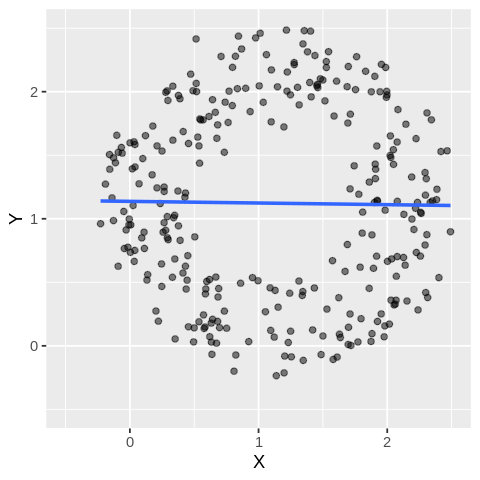

In [2]:
circle_plot

### and this:

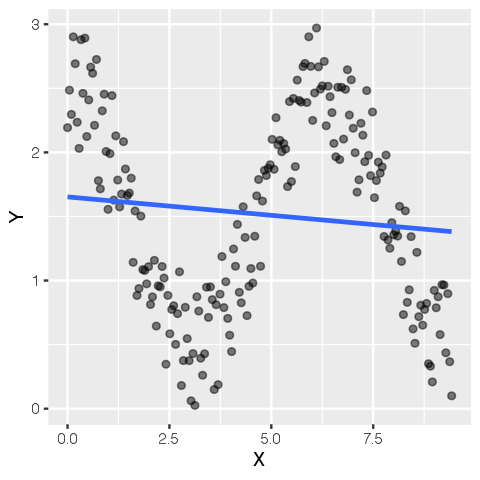

In [3]:
zigzag_plot

## Class activity 1:

Which of the following problems could be solved using a regression approach? 

A) We are interested in predicting CEO salary for new CEO's. We collect a set of data on a number of firms and record profit, number of employees, industry and CEO salary.

B) Whether a new patient will have a heart attack in the next 5 years based on answers to a survey about their physical health and attributes.

C) A car dealership is interested in predicting its net sales based on money spent on Google and Facebook adds.

D) The resting heart rate of a new patient based on answers to a survey about their physical health and attributes.

## What did we learn

- 

- 

- 